In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd

In [2]:
input_path = 'data/'
life_exp_wiki = pd.read_csv(input_path+'lifeExp_Wiki.csv')
life_exp_wb = pd.read_csv(input_path+'lifeExp_WB.csv')

display(life_exp_wb.shape, life_exp_wb.head(2), life_exp_wiki.shape, life_exp_wiki.head(2))

(9602, 3)

,country,year_exp_WB,date
0,http://worldbank.org/Country/ATG,71.004,1988
1,http://worldbank.org/Country/ATG,71.267,1989


(2998, 4)

,country,year_exp,date,gender
0,http://worldbank.org/Country/ATG,74.905,2007-01-01T00:00:00Z,NaN
1,http://worldbank.org/Country/ATG,75.078,2008-01-01T00:00:00Z,NaN


#### Using Date in year

In [3]:
life_exp_wiki.date = life_exp_wiki.date.str.split('-').str[0]
life_exp_wiki.head(2)

,country,year_exp,date,gender
0,http://worldbank.org/Country/ATG,74.905,2007,NaN
1,http://worldbank.org/Country/ATG,75.078,2008,NaN


#### Select countries with life expectancy by gender

In [4]:
life_exp_wiki.gender.value_counts()

http://www.wikidata.org/entity/Q6581097    59
http://www.wikidata.org/entity/Q6581072    59
Name: gender, dtype: int64

In [5]:
wiki_gender = life_exp_wiki.dropna().reset_index(drop=True)
wiki_gender

,country,year_exp,date,gender
0,http://worldbank.org/Country/CAN,80.300,2017,http://www.wikidata.org/entity/Q6581097
1,http://worldbank.org/Country/CAN,84.400,2017,http://www.wikidata.org/entity/Q6581072
2,http://worldbank.org/Country/IDN,53.704,1975,http://www.wikidata.org/entity/Q6581097
3,http://worldbank.org/Country/IDN,64.771,2002,http://www.wikidata.org/entity/Q6581097
4,http://worldbank.org/Country/IDN,60.123,1988,http://www.wikidata.org/entity/Q6581097
...,...,...,...,...
113,http://worldbank.org/Country/IDN,64.554,2001,http://www.wikidata.org/entity/Q6581097
114,http://worldbank.org/Country/IDN,62.176,1993,http://www.wikidata.org/entity/Q6581097
115,http://worldbank.org/Country/IDN,62.580,1994,http://www.wikidata.org/entity/Q6581097
116,http://worldbank.org/Country/IDN,56.440,1980,http://www.wikidata.org/entity/Q6581097


#### Compute average of life expectancy by country and date

In [6]:
df = wiki_gender.groupby(['country', 'date']).apply(lambda x: (sum(x['year_exp']) / x['year_exp'].count())).reset_index()
df = df.rename(columns= {0: 'year_exp'})
df

,country,date,year_exp
0,http://worldbank.org/Country/CAN,2017,82.3500
1,http://worldbank.org/Country/IDN,1960,46.7420
2,http://worldbank.org/Country/IDN,1961,47.3510
3,http://worldbank.org/Country/IDN,1962,47.9490
4,http://worldbank.org/Country/IDN,1963,48.5370
5,http://worldbank.org/Country/IDN,1964,49.1165
6,http://worldbank.org/Country/IDN,1965,49.6920
7,http://worldbank.org/Country/IDN,1966,50.2675
8,http://worldbank.org/Country/IDN,1967,50.8460
9,http://worldbank.org/Country/IDN,1968,51.4280


#### Dataframe with total life expentacy by year

In [7]:
df1 = life_exp_wiki.merge(wiki_gender, how = 'outer', on = ['country', 'year_exp', 'date'],
                       indicator=True).loc[lambda x :x['_merge']=='left_only'].reset_index()
df1 = df1[['country', 'year_exp', 'date']]

life_exp_wiki = pd.concat([df1, df])
life_exp_wiki

,country,year_exp,date
0,http://worldbank.org/Country/ATG,74.9050,2007
1,http://worldbank.org/Country/ATG,75.0780,2008
2,http://worldbank.org/Country/ATG,73.3270,1999
3,http://worldbank.org/Country/ATG,75.2470,2009
4,http://worldbank.org/Country/ATG,73.5410,2000
...,...,...,...
54,http://worldbank.org/Country/IDN,70.2320,2013
55,http://worldbank.org/Country/IDN,70.5345,2014
56,http://worldbank.org/Country/IDN,70.8215,2015
57,http://worldbank.org/Country/IDN,71.0890,2016


In [8]:
life_exp_wb

,country,year_exp_WB,date
0,http://worldbank.org/Country/ATG,71.0040,1988
1,http://worldbank.org/Country/ATG,71.2670,1989
2,http://worldbank.org/Country/ATG,76.6170,2016
3,http://worldbank.org/Country/ARM,68.3320,1988
4,http://worldbank.org/Country/ARM,68.0380,1989
...,...,...,...
9597,http://worldbank.org/Country/PLW,69.1293,2005
9598,http://worldbank.org/Country/PLW,69.0693,1990
9599,http://worldbank.org/Country/PLW,71.8446,1995
9600,http://worldbank.org/Country/PLW,70.4937,2000


In [9]:
life_exp_wb[['year_exp_WB', 'date']] = life_exp_wb[['year_exp_WB', 'date']].apply(pd.to_numeric)
life_exp_wiki[['year_exp', 'date']] = life_exp_wiki[['year_exp', 'date']].apply(pd.to_numeric)

In [10]:
df = life_exp_wiki.merge(life_exp_wb, how = 'inner', on = ['country', 'date'])
df = df.sort_values(['country', 'date'], ascending=True)
df

,country,year_exp,date,year_exp_WB
893,http://worldbank.org/Country/ABW,73.738,1999,73.738
895,http://worldbank.org/Country/ABW,73.787,2000,73.787
897,http://worldbank.org/Country/ABW,73.853,2001,73.853
898,http://worldbank.org/Country/ABW,73.937,2002,73.937
899,http://worldbank.org/Country/ABW,74.038,2003,74.038
...,...,...,...,...
2876,http://worldbank.org/Country/ZWE,56.516,2012,55.032
2883,http://worldbank.org/Country/ZWE,58.053,2013,56.897
2882,http://worldbank.org/Country/ZWE,59.360,2014,58.410
2877,http://worldbank.org/Country/ZWE,60.398,2015,59.534


In [30]:
country = 'ABW'
df1 = df.loc[df.country=='http://worldbank.org/Country/'+country]
df1

,country,year_exp,date,year_exp_WB
893,http://worldbank.org/Country/ABW,73.738,1999,73.738
895,http://worldbank.org/Country/ABW,73.787,2000,73.787
897,http://worldbank.org/Country/ABW,73.853,2001,73.853
898,http://worldbank.org/Country/ABW,73.937,2002,73.937
899,http://worldbank.org/Country/ABW,74.038,2003,74.038
901,http://worldbank.org/Country/ABW,74.156,2004,74.156
904,http://worldbank.org/Country/ABW,74.287,2005,74.287
905,http://worldbank.org/Country/ABW,74.429,2006,74.429
744,http://worldbank.org/Country/ABW,74.576,2007,74.576
890,http://worldbank.org/Country/ABW,74.725,2008,74.725


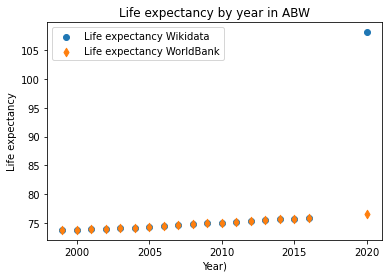

In [31]:
import matplotlib.pyplot as plt


plt.scatter(df1.date, df1.year_exp)
plt.scatter(df1.date, df1.year_exp_WB, marker="d",)

plt.title("Life expectancy by year in " + country)
plt.xlabel("Year)")
plt.ylabel("Life expectancy")
plt.legend(["Life expectancy Wikidata", "Life expectancy WorldBank"])

In [9]:
len(life_exp_wiki.country.unique())

166

In [ ]:
"""
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX p: <http://www.wikidata.org/prop/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ps: <http://www.wikidata.org/prop/statement/>
PREFIX pq: <http://www.wikidata.org/prop/qualifier/>


SELECT DISTINCT ?country ?year_exp ?date ?year_exp_WB ?date_WB WHERE {
  SERVICE <https://labs.tib.eu/sdm/worldbank_endpoint/sparql> {
    ?country a <http://worldbank.org/Country> .
		?country <http://www.w3.org/2002/07/owl#sameAs> ?sameAsCountry .
    ?country <http://worldbank.org/hasAnnualIndicatorEntry> ?annualIndicator .
    ?annualIndicator <http://worldbank.org/hasIndicator> <http://worldbank.org/Indicator/SP.DYN.LE00.IN> .
    ?annualIndicator <http://www.w3.org/2002/07/owl#hasValue> ?year_exp_WB .
    ?annualIndicator <http://www.w3.org/2006/time#year> ?date_WB .


  }
  SERVICE <https://query.wikidata.org/sparql> {
    ?sameAsCountry p:P2250 ?item .
    ?item	ps:P2250 ?year_exp .
    ?item	pq:P585 ?date .
		    
      }
	}
#GROUP BY ?year_exp_WB ?year_exp

"""